In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(''), '..')))

import weighted_imputation as wi
import pprint as pp
from weighted_imputation.io import parser
from weighted_imputation.structures import JunctionTree, DirectedGraph

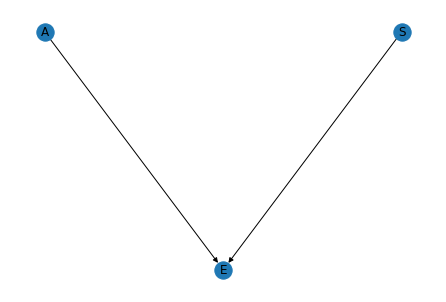

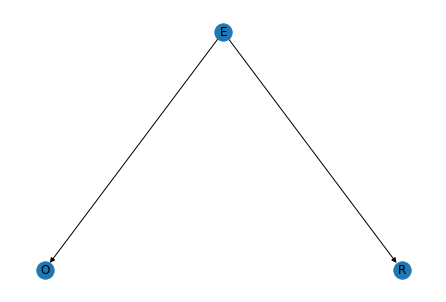

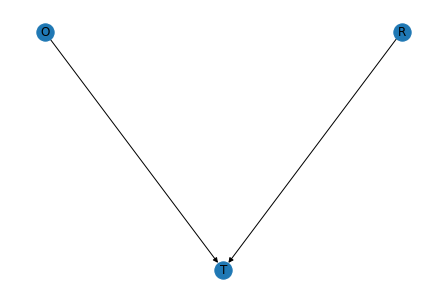

In [2]:
graph = DirectedGraph.from_structure("[A][S][E|A:S][O|E][R|E][T|O:R]")
junction_tree = JunctionTree.from_graph(graph)
cpts_file = parser.parse_network_file("../weighted_imputation/networks/survey.bif")
wi.compute_potentials(junction_tree, cpts_file)

{'asia': {'cpt': [[0.01, 0.99]], 'dependencies': [], 'levels': ['yes', 'no']},
 'bronc': {'cpt': [[['yes'], [0.6, 0.4]], [['no'], [0.3, 0.7]]],
           'dependencies': ['smoke'],
           'levels': ['yes', 'no']},
 'dysp': {'cpt': [[['yes', 'yes'], [0.9, 0.1]],
                  [['no', 'yes'], [0.7, 0.3]],
                  [['yes', 'no'], [0.8, 0.2]],
                  [['no', 'no'], [0.1, 0.9]]],
          'dependencies': ['bronc', 'either'],
          'levels': ['yes', 'no']},
 'either': {'cpt': [[['yes', 'yes'], [1.0, 0.0]],
                    [['no', 'yes'], [1.0, 0.0]],
                    [['yes', 'no'], [1.0, 0.0]],
                    [['no', 'no'], [0.0, 1.0]]],
            'dependencies': ['lung', 'tub'],
            'levels': ['yes', 'no']},
 'lung': {'cpt': [[['yes'], [0.1, 0.9]], [['no'], [0.01, 0.99]]],
          'dependencies': ['smoke'],
          'levels': ['yes', 'no']},
 'smoke': {'cpt': [[0.5, 0.5]], 'dependencies': [], 'levels': ['yes', 'no']},
 'tub': {'cp

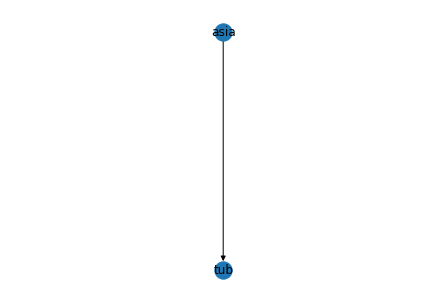

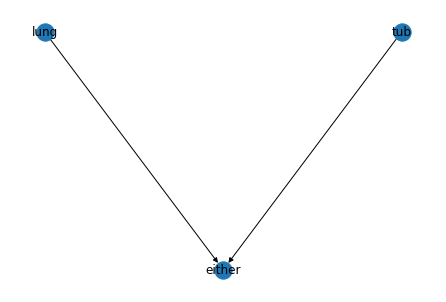

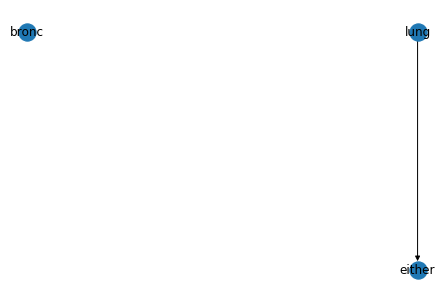

ValueError: ('lung', 'either') must be a permuted list of ('either', 'lung', 'tub'), unless `...` is included

In [3]:
graph = DirectedGraph.from_structure("[asia][smoke][tub|asia][lung|smoke][bronc|smoke][dysp|bronc:either]" +
                                     "[either|tub:lung][xray|either]")
junction_tree = JunctionTree.from_graph(graph)
cpts_file = parser.parse_network_file("../weighted_imputation/networks/asia.bif")
wi.compute_potentials(junction_tree, cpts_file)